We'll be using the "Autistic Spectrum Disorder Screening Data for Adult" public dataset from the UCI repository. The datset was donated by Prof. Fadi Thabtah, after being published in the article "Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment". You can find the article by Fadi Thabtah online.

Road Map:

Step 0: Import Datasets.

Step 1: Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

Step 2: A quick visualization with Seaborn.

Step 3: Applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

Step 4: Experimented with different topologies, optimizers, and hyperparameters for different models.

Step 5: Model tuning.

Step 6: Feature Selection.

Step 7: Build a Multi-Layer Perceptron and train it to classify indivisual with ASD based on its features.

Step 8: Conclusion.



Step 0: Import Datasets.

In [111]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('ASD2.csv', delimiter=',')
# display(data.head(n=5))
data.head(n=5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
1,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
2,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
3,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
4,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES


In [112]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data["Class/ASD"] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 703
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 514
Percentage of individuals diagonised with ASD: 26.88%


This data contains 704 instances, and contains the following attributes:

age: number (Age in years).

gendar: String [Male/Female].

ethnicity: String (List of common ethnicities in text format).

Born with jaundice: Boolean [yes or no].

Family member with PDD: Boolean [yes or no].

Who is completing the test: String [Parent, self, caregiver, medical staff, clinician ,etc.].

Country of residence : String (List of countries in text format).

Used the screening app before : Boolean [yes or no] (Whether the user has used a screening app)

Screening Method Type: Integer [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).

Question 1-10 Answer: Binary [0, 1] (The answer code of the question based on the screening method used).

Screening Score: Integer (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).

# Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [113]:
asd_data = pd.read_csv('ASD2.csv', na_values=['?'])
asd_data.head(n=5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
1,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
2,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
3,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
4,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES


In [114]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,701.000000,703.000000
mean,0.721195,0.452347,0.456615,0.495021,0.499289,0.284495,0.416785,0.648649,0.324324,0.574680,29.703281,4.873400
std,0.448731,0.498078,0.498469,0.500331,0.500355,0.451495,0.493378,0.477732,0.468455,0.494743,16.518660,2.502914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


Step 1: Clean Datasets.

In [115]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
3,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
11,0,1,1,1,1,1,0,0,1,0,...,f,NaN,no,no,Bahamas,no,6,'18 and more',NaN,NO
12,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4,'18 and more',NaN,NO
13,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4,'18 and more',NaN,NO
18,0,0,0,0,0,0,1,1,0,1,...,m,NaN,yes,no,'United Arab Emirates',no,3,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,'United States',no,1,'18 and more',NaN,NO
657,0,0,1,1,0,0,1,0,0,0,...,m,NaN,no,no,Azerbaijan,no,3,'18 and more',NaN,NO
658,1,1,1,1,1,1,0,0,1,1,...,m,NaN,no,no,Pakistan,no,8,'18 and more',NaN,YES
665,0,0,0,0,0,0,0,1,0,0,...,m,NaN,no,no,Iraq,no,1,'18 and more',NaN,NO


In [116]:
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.740132,0.468750,0.480263,0.519737,0.526316,0.307566,0.427632,0.664474,0.342105,0.598684,30.222039,5.075658
std,0.438923,0.499433,0.500022,0.500022,0.499718,0.461866,0.495142,0.472563,0.474805,0.490568,17.300857,2.524516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [117]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object
Total number of records: 608
Individuals diagonised with ASD: 180
Individuals not diagonised with ASD: 428


Step 2: A quick visualization with Seaborn

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

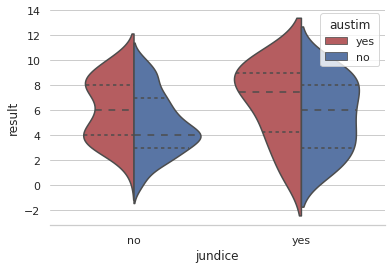

In [119]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

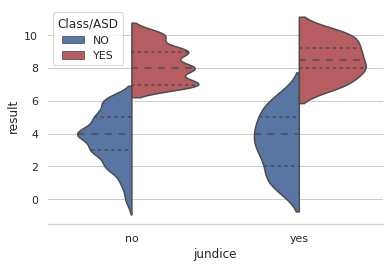

In [120]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

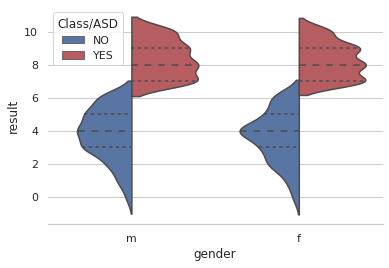

In [121]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


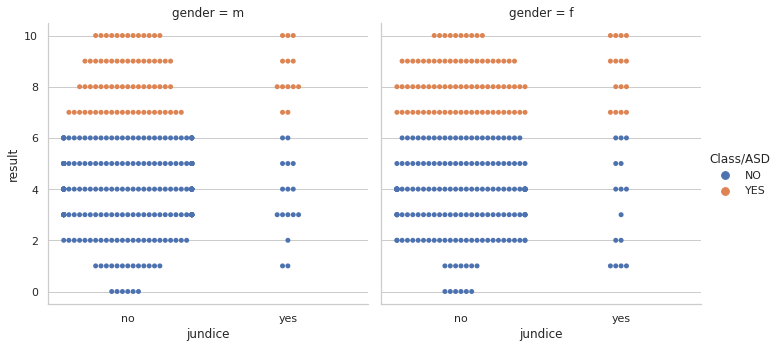

In [122]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


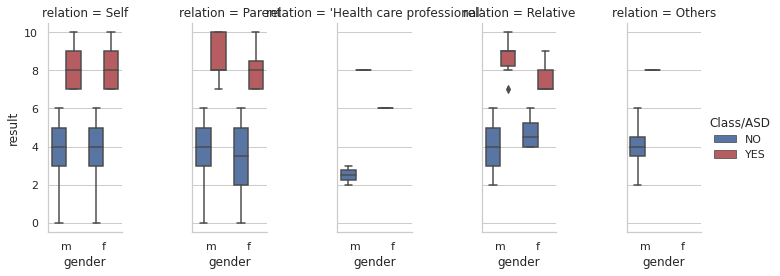

In [123]:
sns.factorplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

In [124]:
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Normalising Data

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
1,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
2,0.049180,f,White-European,no,yes,'United States',0.6,Self,1,1,0,1,0,0,1,1,0,1
4,0.051913,m,Others,yes,no,'United States',0.9,Self,1,1,1,1,1,0,1,1,1,1
5,0.000000,f,Black,no,no,'United States',0.2,Self,0,1,0,0,0,0,0,1,0,0


One-Hot-Coding : Applying one-hot encoding to convert to ethinicity since it is categorial data.

In [126]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()

features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.019126,0.5,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.027322,0.8,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,0.049180,0.6,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0.051913,0.9,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5,0.000000,0.2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


94 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', "contry_of_res_'Costa Rica'", "contry_of_res_'Czech Republic'", "contry_of_res_'New Zealand'", "contry_of_res_'Saudi Arabia'", "contry_of_res_'Sierra Leone'", "contry_of_res_'South Africa'", "contry_of_res_'Sri Lanka'", "contry_of_res_'United Arab Emirates'", "contry_of_res_'United Kingdom'", "contry_of_res_'United States'", "contry_of_res_'Viet Nam'", 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'co

Text(0, 0.5, 'Frequency')

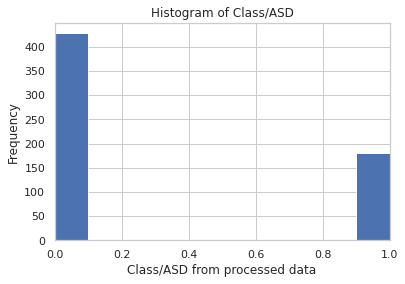

In [127]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

Shuffle And split data

In [128]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 486 samples.
Testing set has 122 samples.


Step 3: Models

Supervised Learning Models
Applied the following supervised learning models in this project which are currently available in scikit-learn.

(1): Decision Trees

(2) Random Forest

(3) Support Vector Machines (SVM)

(4) K-Nearest Neighbors (KNeighbors)

(5) Gaussian Naive Bayes (GaussianNB)

(6) Logistic Regression

Applying models one after another

1) Decision Tree

In [129]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Depiction of Decision Tree

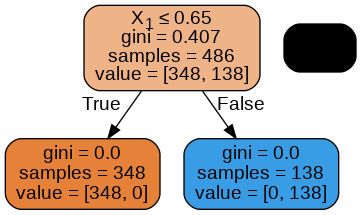

In [130]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png())

# Evaluating Model Performance Metrics

We can use F-beta score as a metric that considers both precision and recall:

 
In particular, when , more emphasis is placed on precision. This is called the F score (or F-score for simplicity).

Note: 
** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

** Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case where we have

a total of 609 records with
180 individuals diagonised with ASD and
429 individuals not diagonised with ASD
accuracy by itself is not a very good metric. Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [131]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [132]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0]
False: [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0]


In [133]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[80  0]
 [ 0 42]]


# Metrics computed from a confusion matrix
Classification Accuracy:

In [134]:
# use float to perform true division, not integer division
print(f'Classification Accuracy: {((TP + TN) / float(TP + TN + FP + FN))}')

Classification Accuracy: 1.0


Classification Error

In [135]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(f'Classification Error: {classification_error}')


Classification Error: 0.0


Sensitivity

In [136]:
sensitivity = TP / float(FN + TP)

print(f'Sensitivity: {sensitivity}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred_class)}')

Sensitivity: 1.0
Recall score: 1.0


Specificity

In [137]:
specificity = TN / (TN + FP)

print(f'Specificity: {specificity}')

Specificity: 1.0


Precision

In [138]:
precision = TP / float(TP + FP)

#print(precision)
print(f'Precision: {metrics.precision_score(y_test, y_pred_class)}')

Precision: 1.0


# Visualising classification prediction

In [139]:
dectree.predict(X_test)[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

In [141]:
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

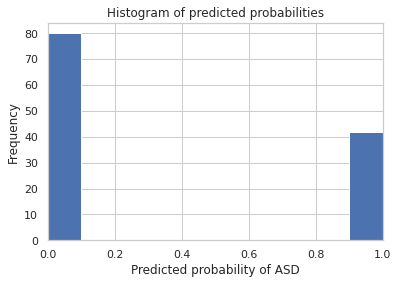

In [142]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

# Receiver Operating Characteristic (ROC) Curves
Checking how sensitivity and specificity are affected by different thresholds.

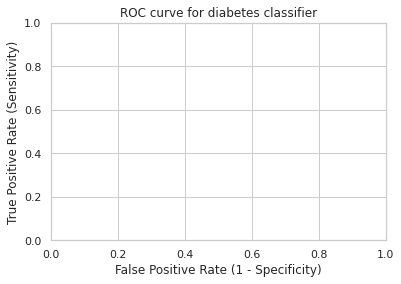

In [143]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Score metric for Model performance

In [144]:
dectree.score(X_test, y_test)

1.0

Cross-validation: Using k-cross validation instead of splitting. (k = 10)

In [145]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

print(f'Cross validation score: {cv_scores.mean()}')

Cross validation score: 1.0


AUC score: Percentage of ROC plot under the curve

In [146]:
# calculate cross-validated AUC
print('AUC Score')
print(cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean())

AUC Score
1.0


F-beta Score:

In [147]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
print('F-Beta Score')
print(fbeta_score(y_test, predictions_test, average='binary', beta=0.5))

F-Beta Score
1.0


2)Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
print(f'Cross validation score: {cv_scores.mean()}')

Cross validation score: 0.9983606557377049


AUC score: Percentage of ROC plot under the curve

In [149]:
# calculate cross-validated AUC
print('AUC Score')
print(cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean())

AUC Score
1.0


F-beta Score:

In [150]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
print('F-Beta Score')
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

F-Beta Score


1.0

3) Support Vector Machines

In [151]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [152]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

print(f'Cross validation score: {cv_scores.mean()}')

Cross validation score: 1.0


AUC score: Percentage of ROC plot under the curve

In [153]:
# calculate cross-validated AUC
# from sklearn.cross_validation import cross_val_score
print('AUC score')
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

AUC score


1.0

F-Beta

In [154]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
print('F-Beta score')
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

F-Beta score


1.0

4) K Nearest Neighbour

In [155]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
print('Cross Validation Score')
cv_scores.mean()

Cross Validation Score


0.9457103825136611

AUC Score

In [156]:
# calculate cross-validated AUC
# from sklearn.cross_validation import cross_val_score
print('AUC Score')
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

AUC Score


0.9927925433739387

In [157]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
print('F-Beta Score')
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

F-Beta Score


0.9653465346534654

To choose KNN, we need to find ideal value of K, so we tried testing various values of K

In [158]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (f'K: {n}, Cross Validation Score: {cv_scores.mean()}')

K: 10, Cross Validation Score: 0.9457103825136611
K: 11, Cross Validation Score: 0.9506557377049181
K: 12, Cross Validation Score: 0.9489890710382513
K: 13, Cross Validation Score: 0.9522950819672131
K: 14, Cross Validation Score: 0.947377049180328
K: 15, Cross Validation Score: 0.9440983606557378
K: 16, Cross Validation Score: 0.9506557377049181
K: 17, Cross Validation Score: 0.9522950819672129
K: 18, Cross Validation Score: 0.9522677595628414
K: 19, Cross Validation Score: 0.953934426229508
K: 20, Cross Validation Score: 0.9522677595628414
K: 21, Cross Validation Score: 0.9522950819672129
K: 22, Cross Validation Score: 0.9473224043715845
K: 23, Cross Validation Score: 0.9506010928961748
K: 24, Cross Validation Score: 0.9506010928961747
K: 25, Cross Validation Score: 0.9522404371584698
K: 26, Cross Validation Score: 0.9522404371584698
K: 27, Cross Validation Score: 0.9522677595628414
K: 28, Cross Validation Score: 0.9506010928961747
K: 29, Cross Validation Score: 0.9506284153005463
K:

5) Naive Bayes

In [159]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)
print('Cross validation Score')
cv_scores.mean()

Cross validation Score


0.883224043715847

AUC Score

In [160]:
# calculate cross-validated AUC
# from sklearn.cross_validation import cross_val_score
print('AUC Score')
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

AUC Score


0.9449212501538083

F-Beta Score

In [161]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
print('F-Beta Score')
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

F-Beta Score


0.8108108108108107

6) Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
print('Cross Validation Score')
cv_scores.mean()

Cross Validation Score


0.9934426229508198

AUC Score

In [163]:
# calculate cross-validated AUC
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
print('AUC Score')
cv_scores_roc.mean()

AUC Score


1.0

F-Beta Score

In [164]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
print('F-Beta Score')
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

F-Beta Score


0.9951456310679611

Model Tuning

In [165]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# TODO: Initialize the classifier
clf = SVC(random_state = 1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Unoptimized model
------
Accuracy score on testing data: 0.9672
F-score on testing data: 0.9653

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


Step 5: Model tuning.

In [166]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)


[ 1.82809838e-15  1.00000000e+00  0.00000000e+00  6.80333901e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.98101634e-17
  0.00000000e+00  5.12901336e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.20045496e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

Step 6: Feature Importance

An important task when performing supervised learning on a dataset like the autistic data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual has ASD or not.

Choose a scikit-learn classifier (e.g., gradientBoosting, adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the ASD dataset.

In [167]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)

[ 1.82809838e-15  1.00000000e+00  0.00000000e+00  6.80333901e-18
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.98101634e-17
  0.00000000e+00  5.12901336e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.20045496e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [168]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


Feature Selection

From the visualization above, we see that the top five most important features(in order with their weightage factor) contribute more than half of the importance of all features present in the data. These 5 features are:

'result'

'relation_self'

'country_of_residence'

'jundice_no'

'jundice_yes'

This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. Although looking at those weight factor it seems like 'result' feature is clearly dominating its influence on the algorithms over all other features.

Step 7) Building a MLP model architecture.

In [169]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [170]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 94))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 760       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [171]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [172]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
31/31 - 4s - loss: 0.6777 - accuracy: 0.6749 - val_loss: 0.6702 - val_accuracy: 0.6557 - 4s/epoch - 128ms/step
Epoch 2/100
31/31 - 0s - loss: 0.6512 - accuracy: 0.7160 - val_loss: 0.6508 - val_accuracy: 0.6557 - 216ms/epoch - 7ms/step
Epoch 3/100
31/31 - 0s - loss: 0.6229 - accuracy: 0.7160 - val_loss: 0.6300 - val_accuracy: 0.6557 - 285ms/epoch - 9ms/step
Epoch 4/100
31/31 - 0s - loss: 0.5904 - accuracy: 0.7160 - val_loss: 0.6076 - val_accuracy: 0.6557 - 273ms/epoch - 9ms/step
Epoch 5/100
31/31 - 0s - loss: 0.5581 - accuracy: 0.7160 - val_loss: 0.5839 - val_accuracy: 0.6557 - 211ms/epoch - 7ms/step
Epoch 6/100
31/31 - 0s - loss: 0.5295 - accuracy: 0.7160 - val_loss: 0.5588 - val_accuracy: 0.6557 - 277ms/epoch - 9ms/step
Epoch 7/100
31/31 - 0s - loss: 0.5065 - accuracy: 0.7160 - val_loss: 0.5323 - val_accuracy: 0.6557 - 204ms/epoch - 7ms/step
Epoch 8/100
31/31 - 0s - loss: 0.4789 - accuracy: 0.7160 - val_loss: 0.5079 - val_accuracy: 0.6557 - 149ms/epoch - 5ms/step
Epoch 9/1

Evaluating the model

In [173]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 1.0000

 Training Accuracy: 1.0

 Testing accuracy:  0.9508196711540222


Step 8) Conclusion

Out of all the models, we concluded that SVM and MLP provide the best accuracy.